In [1]:
import time
import sys
import os
import math
import random
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import CellModeller

In [2]:
# using Deg03 to check correct values of 
path = '../Data/'
model = 'simpleGrowth10_1/'
files = os.listdir(path+model)
files.sort()
# not using module (think on removing it)
files = files[1:]

In [3]:
# get last pickle's lineage
last_pickle = pickle.load(open(path+model+files[-1], 'rb'))

# constructing data
lin = last_pickle['lineage']
nodes = list(lin.keys())
edges = [(v,k) for k,v in lin.items()]

# create directed graph
G1 = nx.DiGraph()
# add cell's ids as nodes
G1.add_node(1)
G1.add_nodes_from(nodes)
# add (parent_id, child_id) tuples as edges
G1.add_edges_from(edges)

In [170]:
# create directed graph
G2 = nx.DiGraph()
# add cell's ids as nodes
G2.add_node(1)
G2.add_nodes_from(nodes)
# add (parent_id, child_id) tuples as edges
G2.add_edges_from(edges)

In [4]:
# just testing
list(G1.successors(2))

[4, 5]

#### test gamma=1 alpha = 10000

In [5]:
path = 'SIMS/'
files = os.listdir(path)
#files

### NEW

In [6]:
gamma = 0.3
d = 10000.0
with open(path+f"data_contSIM_{gamma}_{d}.json") as json_file:  
    database = json.load(json_file)

In [7]:
len(database)

1027

In [8]:
data = database['392']
idx = [k for k in data.keys()]
cells = np.random.choice(idx, 1000, replace=False)

In [9]:
cols = list(range(0, len(cells)))
cols.append('rad_edge')

In [10]:
len(cols)

1001

In [11]:
start = 392
df = pd.DataFrame(index=range(start, 1026), columns=cols)
malos = []

In [12]:
for it in range(start, 1026):
    print("####################################")
    print(f"it: {it}")
    data = database[str(it)]
    posx = np.array([data[ky]['pos'][0] for ky in data.keys()])
    posy = np.array([data[ky]['pos'][1] for ky in data.keys()])
    r_cells = np.sqrt(posx**2+posy**2)
    r_max = r_cells.max()
    
    print(f"Rad max: {r_max}")
    
    df.loc[it]['rad_edge'] = r_max
    # for all cells in "cells"
    for i, cell in enumerate(cells):
        # it hasn't divided
        #print(f"Cell {cell}")
        if cell in data.keys():            
            fluo = data[cell]['fluo']
            pos = data[cell]['pos']
            gr = data[cell]['growthRate']
            vol = data[cell]['volume']
            
            rad = np.sqrt(pos[0]**2+pos[1]**2)
            df.loc[it][i] = {'rad':rad, 'fluo': fluo, 'gr': gr, 'vol':vol}
            #print(f"Rad cell {cell}: {rad}")
        # divided
        else:
            try:
                succ = list(G1.successors(int(cell)))
                index = np.where(cells ==cell)
                print(f"Cell antes {cells[index]}")
                cell_new = str(succ[random.choice([0,1])])
                cells[index] = cell_new
                print(f"Cell después {cells[index]}")
                cell = cell_new

                fluo = data[cell]['fluo']
                pos = data[cell]['pos']
                gr = data[cell]['growthRate']
                vol = data[cell]['volume']

                rad = np.sqrt(pos[0]**2+pos[1]**2)
                df.loc[it][i] = {'rad':rad, 'fluo': fluo, 'gr': gr, 'vol':vol}
                #print(f"Rad cell {cell}: {rad}")
            except:
                print(f"for cell {cell}, indice {i}, skip")
                malos.append([cell, i])
                continue

####################################
it: 392
Rad max: 70.88386621780315
####################################
it: 393
Rad max: 70.92592155520127
Cell antes ['7948']
Cell después ['10040']
Cell antes ['7469']
Cell después ['10039']
Cell antes ['8456']
Cell después ['10064']
####################################
it: 394
Rad max: 71.05759756635976
Cell antes ['6655']
Cell después ['10088']
Cell antes ['7410']
Cell después ['10097']
Cell antes ['5965']
Cell después ['10081']
Cell antes ['7937']
Cell después ['10110']
Cell antes ['6381']
Cell después ['10083']
Cell antes ['7759']
Cell después ['10106']
####################################
it: 395
Rad max: 71.29646513273856
Cell antes ['8284']
Cell después ['10202']
Cell antes ['8940']
Cell después ['10218']
Cell antes ['7955']
Cell después ['10194']
Cell antes ['7041']
Cell después ['10174']
Cell antes ['8357']
Cell después ['10205']
Cell antes ['7193']
Cell después ['10178']
Cell antes ['8443']
Cell después ['10209']
Cell antes ['6702']
Cell

Cell antes ['6468']
Cell después ['11527']
Cell antes ['7274']
Cell después ['11535']
Cell antes ['8715']
Cell después ['11555']
####################################
it: 415
Rad max: 75.96403784694111
Cell antes ['9799']
Cell después ['11637']
Cell antes ['7940']
Cell después ['11612']
Cell antes ['10019']
Cell después ['11650']
####################################
it: 416
Rad max: 76.20358134809688
Cell antes ['9809']
Cell después ['11754']
Cell antes ['1765']
Cell después ['11660']
Cell antes ['9849']
Cell después ['11759']
Cell antes ['7738']
Cell después ['11715']
Cell antes ['10008']
Cell después ['11766']
Cell antes ['6354']
Cell después ['11690']
Cell antes ['756']
Cell después ['11659']
Cell antes ['10344']
Cell después ['11784']
Cell antes ['10268']
Cell después ['11783']
Cell antes ['4177']
Cell después ['11672']
Cell antes ['6355']
Cell después ['11693']
####################################
it: 417
Rad max: 76.44854085246602
Cell antes ['9574']
Cell después ['11811']
Cell an

Cell antes ['8249']
Cell después ['13539']
Cell antes ['9363']
Cell después ['13552']
Cell antes ['3120']
Cell después ['13496']
Cell antes ['8179']
Cell después ['13536']
####################################
it: 438
Rad max: 81.79385033332157
Cell antes ['11192']
Cell después ['13660']
Cell antes ['11759']
Cell después ['13685']
Cell antes ['11116']
Cell después ['13657']
Cell antes ['11112']
Cell después ['13654']
####################################
it: 439
Rad max: 82.0046112464526
Cell antes ['7849']
Cell después ['13699']
Cell antes ['11754']
Cell después ['13757']
Cell antes ['9801']
Cell después ['13708']
Cell antes ['7108']
Cell después ['13697']
####################################
it: 440
Rad max: 82.28624458157444
Cell antes ['6074']
Cell después ['13793']
Cell antes ['9353']
Cell después ['13834']
Cell antes ['3750']
Cell después ['13783']
Cell antes ['11060']
Cell después ['13868']
Cell antes ['11442']
Cell después ['13887']
Cell antes ['7184']
Cell después ['13807']
Cell

Cell antes ['5790']
Cell después ['15987']
Cell antes ['8087']
Cell después ['15998']
Cell antes ['1961']
Cell después ['15973']
Cell antes ['5086']
Cell después ['15983']
Cell antes ['9665']
Cell después ['16021']
Cell antes ['3902']
Cell después ['15978']
####################################
it: 465
Rad max: 87.83537776965244
Cell antes ['13952']
Cell después ['16172']
####################################
it: 466
Rad max: 88.06227930284578
Cell antes ['11088']
Cell después ['16189']
Cell antes ['11479']
Cell después ['16190']
Cell antes ['13584']
Cell después ['16220']
Cell antes ['6437']
Cell después ['16180']
####################################
it: 467
Rad max: 88.31852447748044
Cell antes ['8599']
Cell después ['16259']
Cell antes ['9768']
Cell después ['16269']
Cell antes ['9285']
Cell después ['16262']
####################################
it: 468
Rad max: 88.54828563482666
Cell antes ['13603']
Cell después ['16387']
Cell antes ['11451']
Cell después ['16366']
##################

Cell antes ['8930']
Cell después ['19657']
####################################
it: 501
Rad max: 97.7785656217035
Cell antes ['16387']
Cell después ['19791']
Cell antes ['13918']
Cell después ['19757']
Cell antes ['14630']
Cell después ['19762']
####################################
it: 502
Rad max: 98.04015455820137
Cell antes ['15467']
Cell después ['19897']
Cell antes ['16695']
Cell después ['19917']
####################################
it: 503
Rad max: 98.24922218721652
Cell antes ['15463']
Cell después ['20018']
Cell antes ['8929']
Cell después ['19980']
Cell antes ['8603']
Cell después ['19976']
####################################
it: 504
Rad max: 98.54826022084838
Cell antes ['17792']
Cell después ['20281']
Cell antes ['16995']
Cell después ['20255']
Cell antes ['3086']
Cell después ['20111']
Cell antes ['15062']
Cell después ['20210']
Cell antes ['16975']
Cell después ['20250']
Cell antes ['8203']
Cell después ['20145']
Cell antes ['5515']
Cell después ['20128']
Cell antes ['41

Cell antes ['11939']
Cell después ['25130']
####################################
it: 549
Rad max: 109.64215842584359
Cell antes ['11311']
Cell después ['25299']
Cell antes ['19791']
Cell después ['25312']
####################################
it: 550
Rad max: 109.89321771773179
Cell antes ['17912']
Cell después ['25394']
####################################
it: 551
Rad max: 110.11814206053613
Cell antes ['20255']
Cell después ['25527']
####################################
it: 552
Rad max: 110.3699647401648
Cell antes ['8598']
Cell después ['25596']
####################################
it: 553
Rad max: 110.60151727125236
Cell antes ['9078']
Cell después ['25728']
####################################
it: 554
Rad max: 110.79315338301228
Cell antes ['17340']
Cell después ['25849']
####################################
it: 555
Rad max: 111.00496051436829
Cell antes ['9990']
Cell después ['25956']
Cell antes ['14049']
Cell después ['25967']
Cell antes ['8701']
Cell después ['25950']
##########

####################################
it: 616
Rad max: 127.12585512924998
####################################
it: 617
Rad max: 127.35640821626741
Cell antes ['24960']
Cell después ['34250']
####################################
it: 618
Rad max: 127.60091182979116
####################################
it: 619
Rad max: 127.82166880570735
####################################
it: 620
Rad max: 128.05993517646996
Cell antes ['8429']
Cell después ['34628']
####################################
it: 621
Rad max: 128.28676548751054
Cell antes ['11977']
Cell después ['34789']
####################################
it: 622
Rad max: 128.47121418482152
Cell antes ['15452']
Cell después ['34927']
####################################
it: 623
Rad max: 129.00242513029306
####################################
it: 624
Rad max: 129.27861830247295
####################################
it: 625
Rad max: 129.54272000099826
####################################
it: 626
Rad max: 129.76558122200032
######################

####################################
it: 702
Rad max: 148.26573926923047
####################################
it: 703
Rad max: 148.4520318126948
####################################
it: 704
Rad max: 148.58362505764782
####################################
it: 705
Rad max: 149.24361844008166
####################################
it: 706
Rad max: 149.24383136325477
####################################
it: 707
Rad max: 149.3652751226774
Cell antes ['15545']
Cell después ['48532']
####################################
it: 708
Rad max: 149.5794436692866
####################################
it: 709
Rad max: 149.79822226973684
####################################
it: 710
Rad max: 151.0617894942027
Cell antes ['13335']
Cell después ['49067']
Cell antes ['2231']
Cell después ['49040']
Cell antes ['12808']
Cell después ['49065']
Cell antes ['14034']
Cell después ['49072']
Cell antes ['9173']
Cell después ['49054']
####################################
it: 711
Rad max: 151.2862371878994
#############

####################################
it: 796
Rad max: 172.63500858481774
####################################
it: 797
Rad max: 172.80087512384273
####################################
it: 798
Rad max: 172.92888624324831
####################################
it: 799
Rad max: 173.06968358477442
####################################
it: 800
Rad max: 173.22109844259887
####################################
it: 801
Rad max: 174.11894717823222
####################################
it: 802
Rad max: 174.35035137664124
####################################
it: 803
Rad max: 174.56540869979818
####################################
it: 804
Rad max: 174.71523647928313
####################################
it: 805
Rad max: 174.94445435678804
Cell antes ['6701']
Cell después ['66846']
Cell antes ['10771']
Cell después ['66879']
Cell antes ['14359']
Cell después ['66899']
Cell antes ['1229']
Cell después ['66823']
Cell antes ['9955']
Cell después ['66871']
Cell antes ['4589']
Cell después ['66837']
##########

####################################
it: 898
Rad max: 199.0201705086489
####################################
it: 899
Rad max: 199.29916097482126
####################################
it: 900
Rad max: 199.53257710230267
####################################
it: 901
Rad max: 199.73564149477676
####################################
it: 902
Rad max: 199.8947528285263
####################################
it: 903
Rad max: 200.1033274359641
Cell antes ['5931']
Cell después ['88599']
Cell antes ['19498']
Cell después ['88604']
####################################
it: 904
Rad max: 200.8528204795115
####################################
it: 905
Rad max: 200.90115136660313
####################################
it: 906
Rad max: 200.92646526613828
####################################
it: 907
Rad max: 201.1323786472231
####################################
it: 908
Rad max: 201.34515304513832
####################################
it: 909
Rad max: 201.6017210562437
####################################
it: 91

####################################
it: 992
Rad max: 222.9579308014571
####################################
it: 993
Rad max: 223.10628452939636
####################################
it: 994
Rad max: 223.28486461376974
####################################
it: 995
Rad max: 223.49282269112894
####################################
it: 996
Rad max: 223.8076790268978
####################################
it: 997
Rad max: 224.09304569840037
####################################
it: 998
Rad max: 224.37312845647403
####################################
it: 999
Rad max: 224.64389468950628
####################################
it: 1000
Rad max: 224.89918123069958
####################################
it: 1001
Rad max: 225.16404851214187
####################################
it: 1002
Rad max: 225.42338899217611
####################################
it: 1003
Rad max: 225.66216114621966
####################################
it: 1004
Rad max: 225.88805506602574
####################################
it: 1005
Ra

In [13]:
malos

[['11778', 565],
 ['13620', 565],
 ['13065', 55],
 ['12073', 809],
 ['14484', 809],
 ['17353', 809]]

In [29]:
df = df.dropna(axis=1)

In [30]:
len(df.columns)

998

In [31]:
df.to_json('fluo_tracking_1000.json')

In [ ]:

R = [cell_serie.loc[idx][1][0] for idx in df.index]
G = [cell_serie.loc[idx][1][1] for idx in df.index]
B = [cell_serie.loc[idx][1][2] for idx in df.index]

plt.plot(R, 'r')
plt.plot(G, 'g')
plt.plot(B, 'b')

plt.show()

### When loading a file

In [32]:
with open('fluo_tracking_1000.json') as json_file:  
    database = json.load(json_file)

In [33]:
type(database)

dict

In [34]:
df = pd.DataFrame(database)

In [40]:
len(df.columns)

998

In [42]:
cols = list(range(0, len(df.columns)-1))

In [43]:
cols.append('rad_edge')

In [51]:
cols = [str(c) for c in cols]

In [53]:
df.columns = cols

In [54]:
type(df)

pandas.core.frame.DataFrame

In [61]:
df['55'][392]

{'rad': 68.3752203605,
 'fluo': [12.0077775619, 76.1109526087, 346.556648602],
 'gr': 0.0,
 'vol': 1.4331586361}

idx: 0


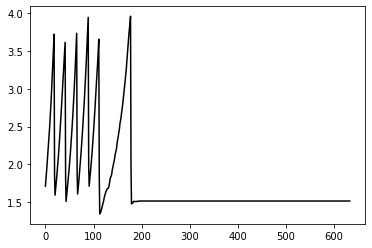

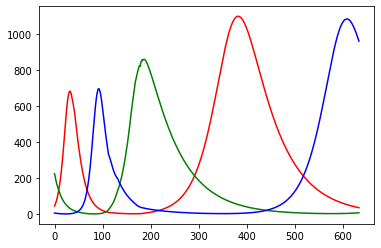

idx: 1


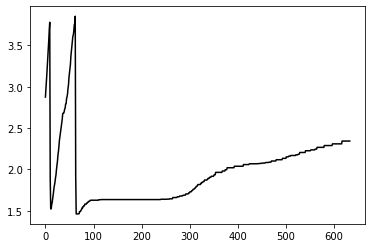

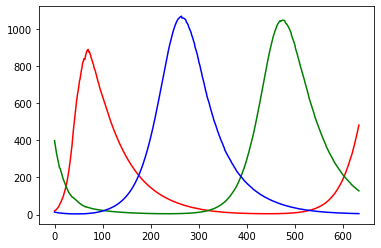

idx: 2


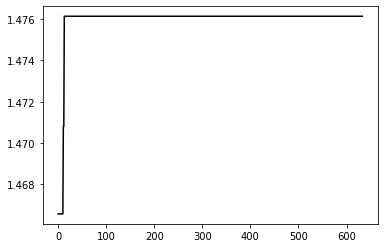

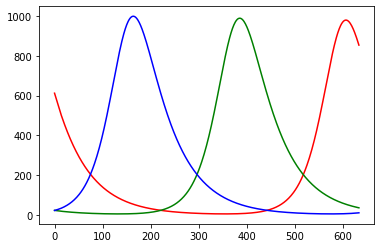

idx: 3


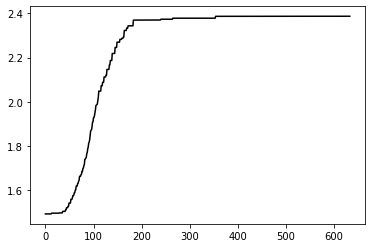

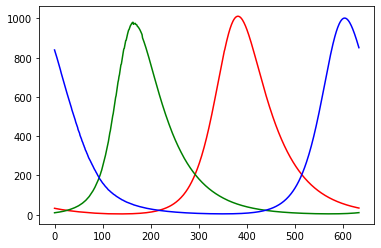

idx: 4


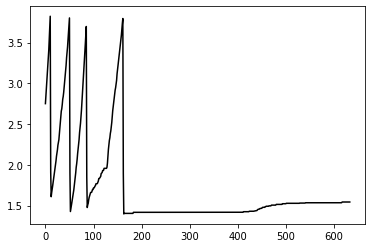

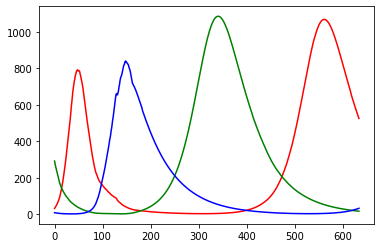

idx: 5


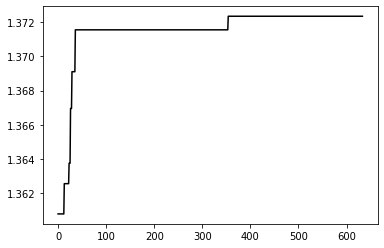

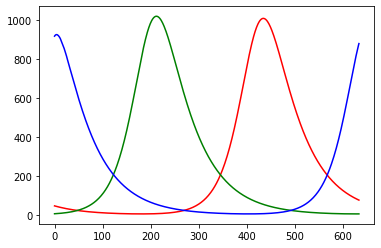

idx: 6


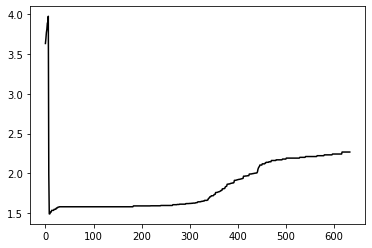

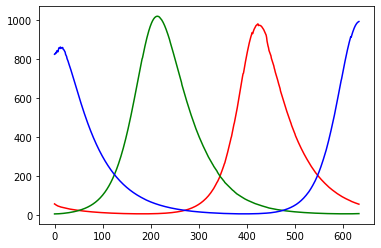

idx: 7


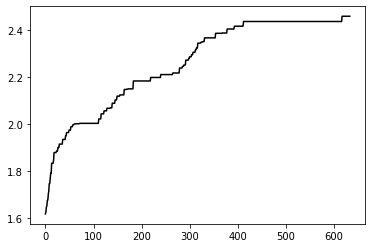

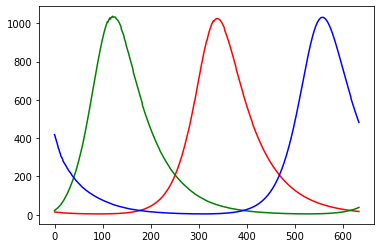

idx: 8


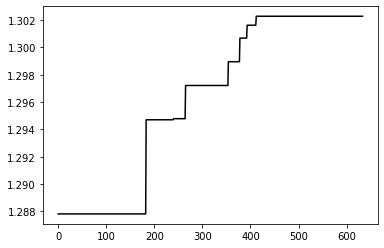

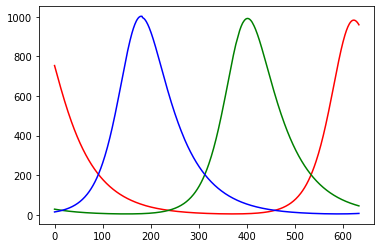

idx: 9


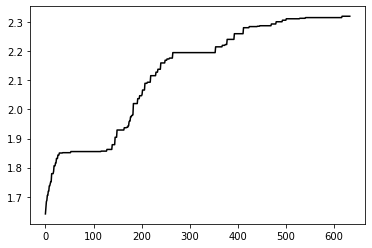

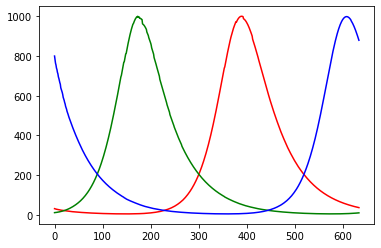

idx: 10


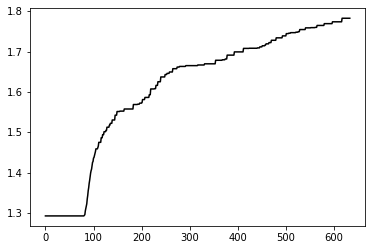

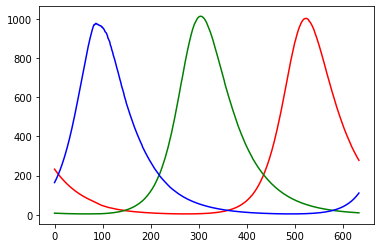

idx: 11


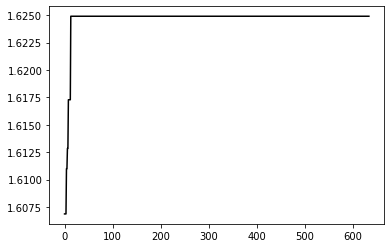

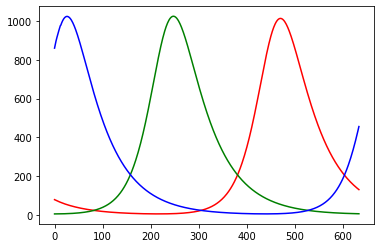

idx: 12


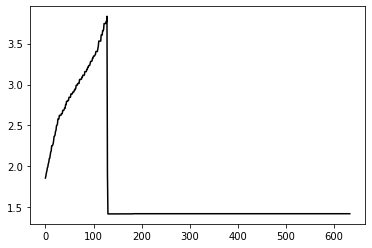

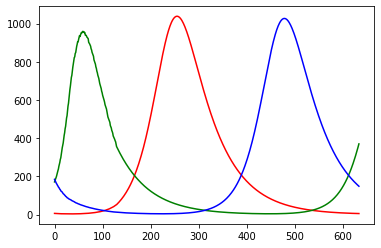

idx: 13


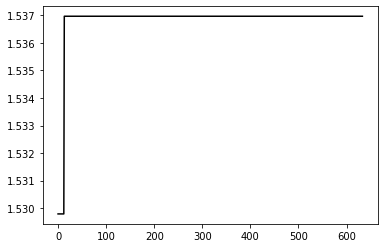

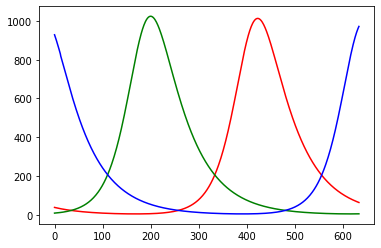

idx: 14


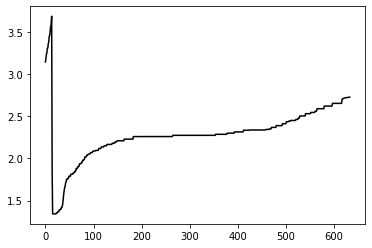

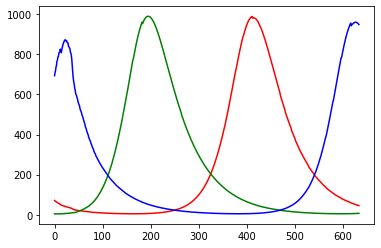

idx: 15


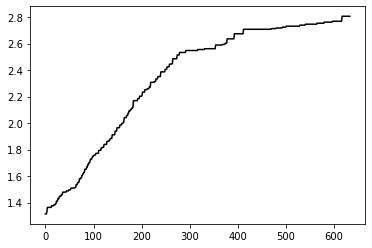

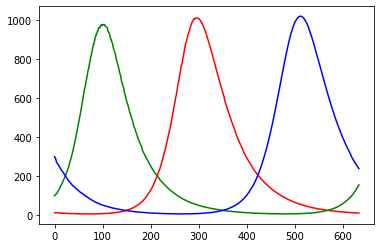

idx: 16


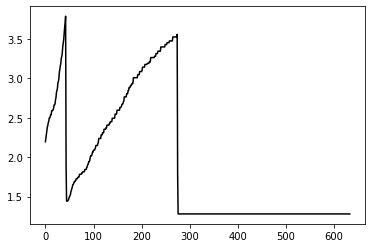

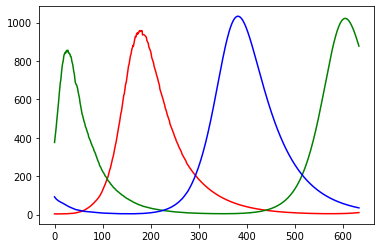

idx: 17


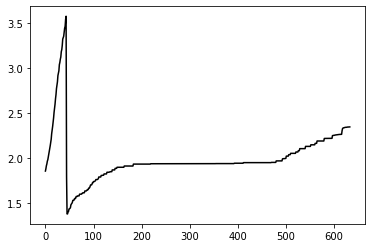

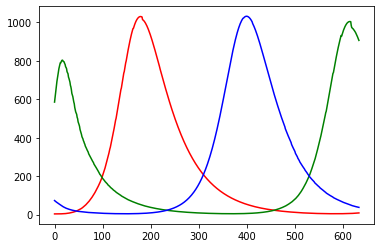

idx: 18


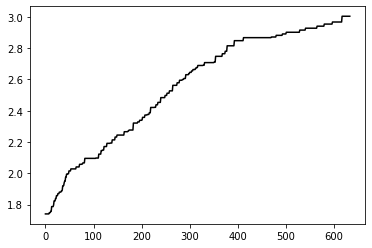

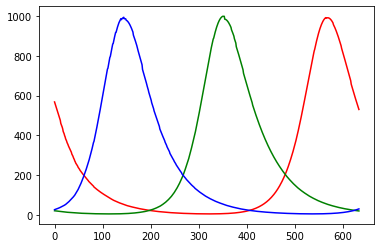

idx: 19


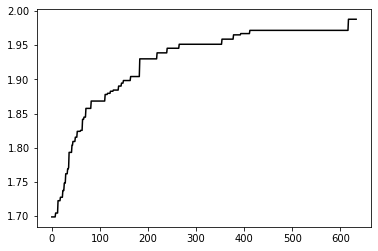

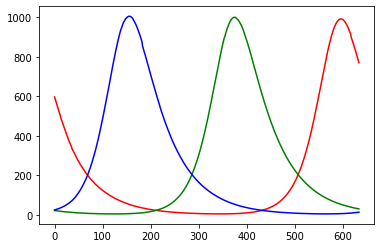

idx: 20


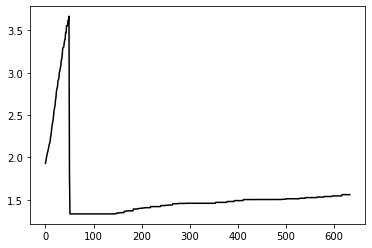

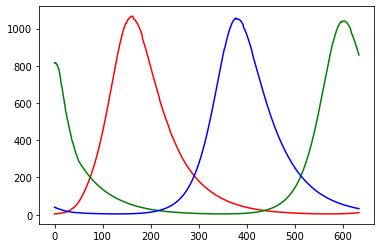

idx: 21


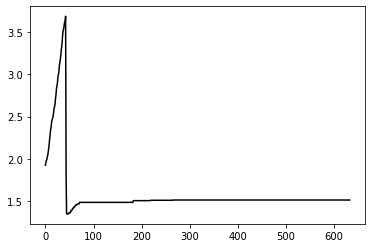

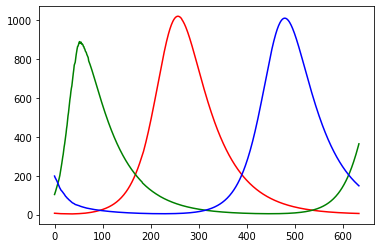

idx: 22


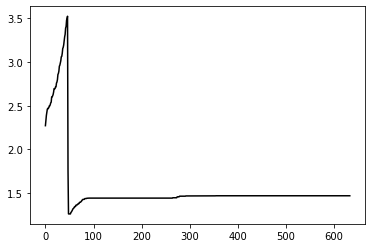

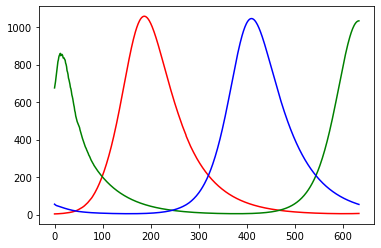

idx: 23


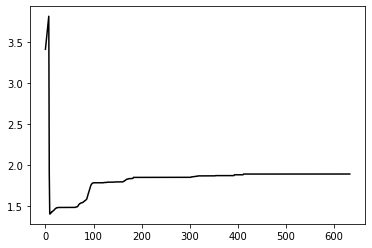

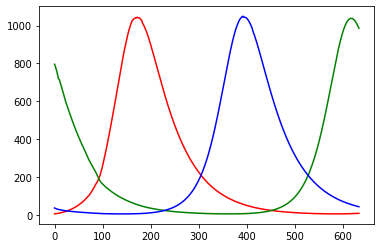

idx: 24


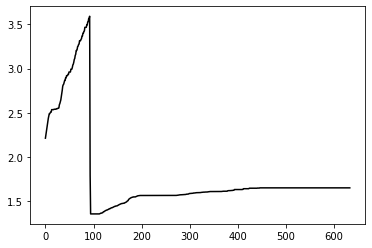

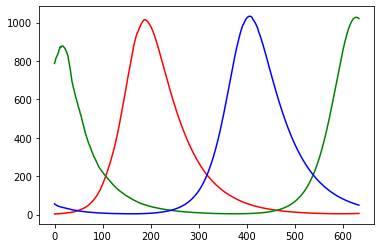

idx: 25


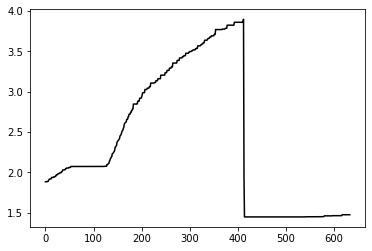

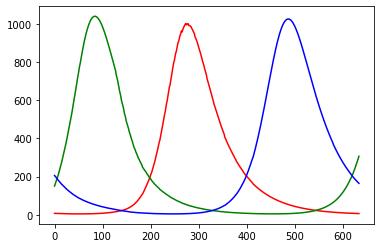

idx: 26


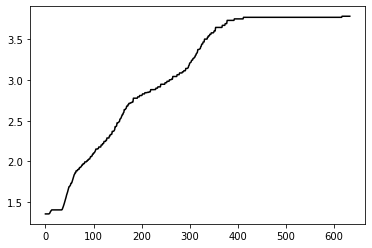

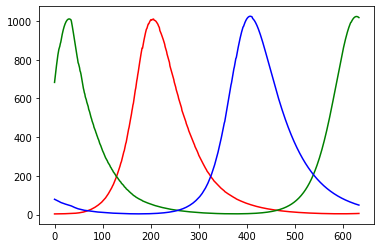

idx: 27


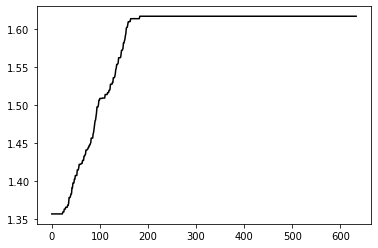

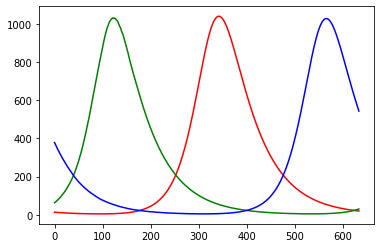

idx: 28


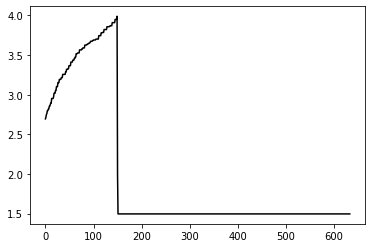

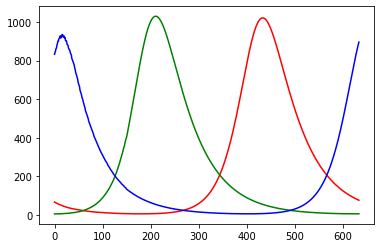

idx: 29


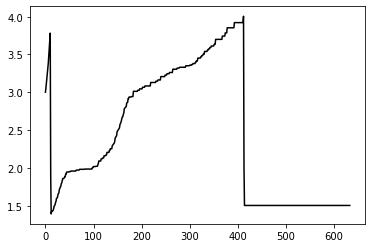

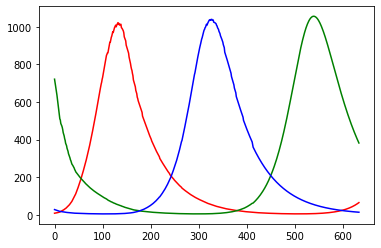

idx: 30


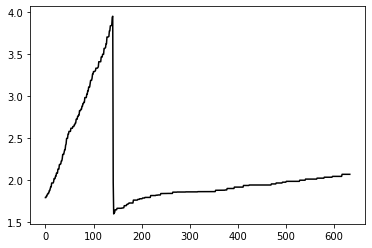

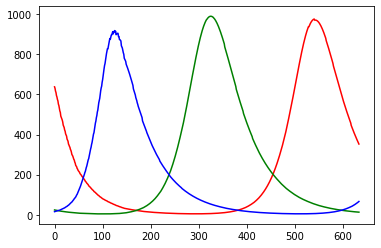

idx: 31


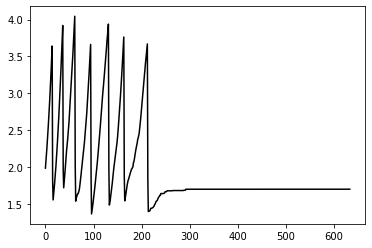

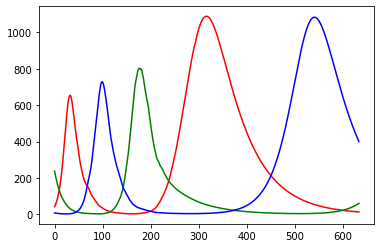

idx: 32


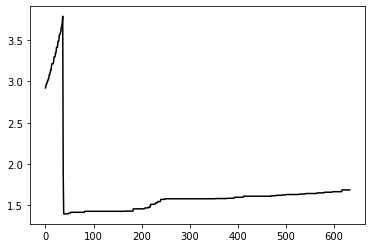

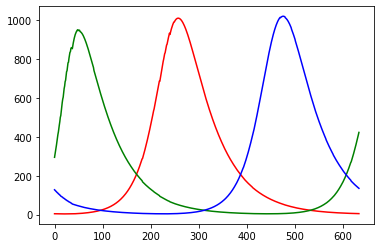

idx: 33


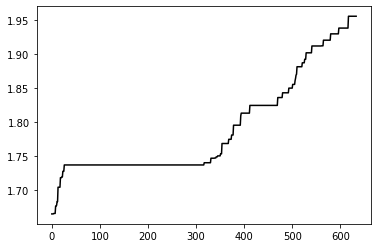

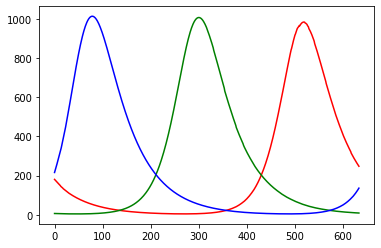

idx: 34


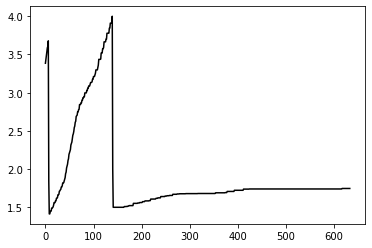

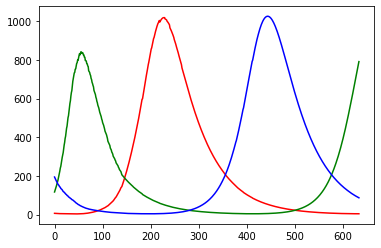

idx: 35


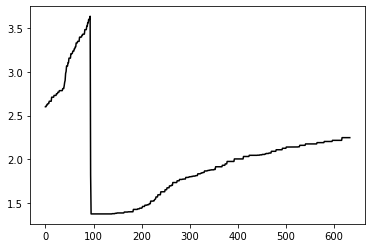

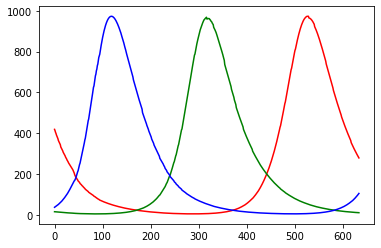

idx: 36


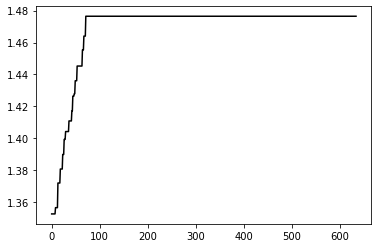

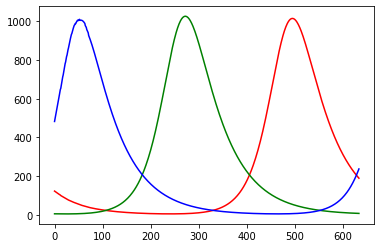

idx: 37


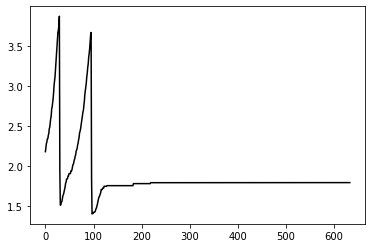

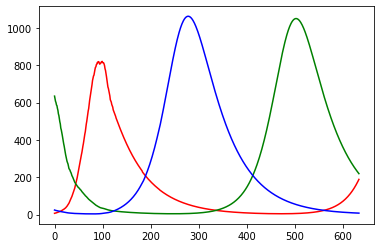

idx: 38


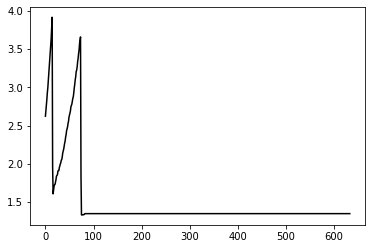

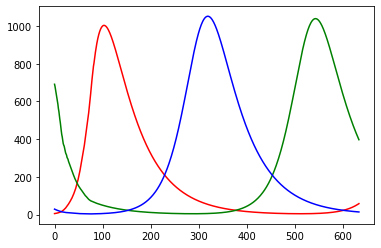

idx: 39


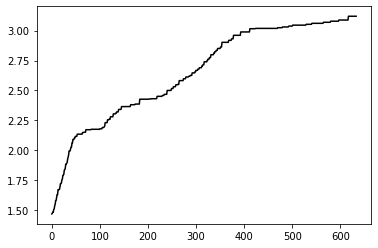

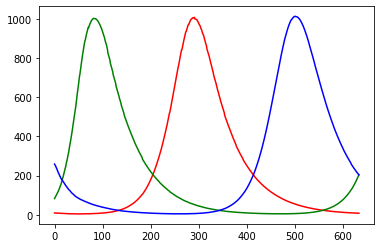

idx: 40


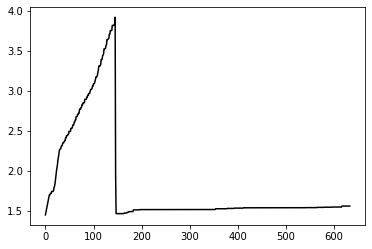

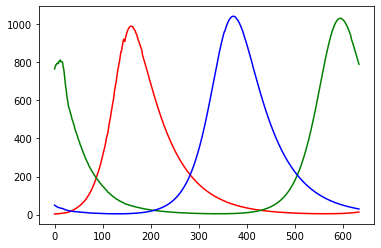

idx: 41


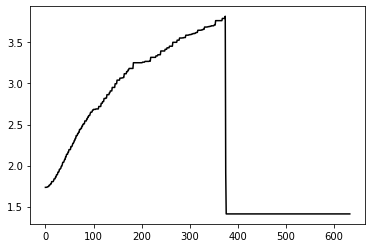

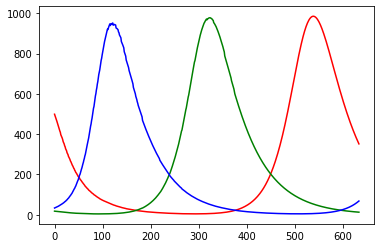

idx: 42


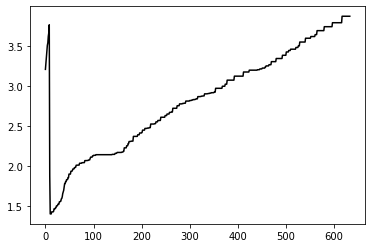

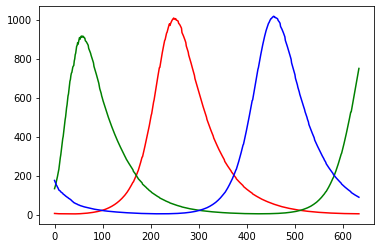

idx: 43


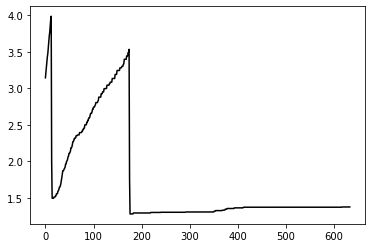

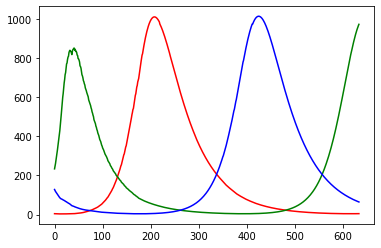

idx: 44


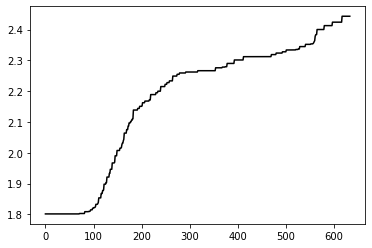

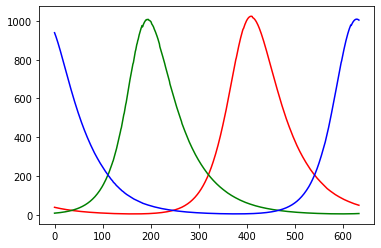

idx: 45


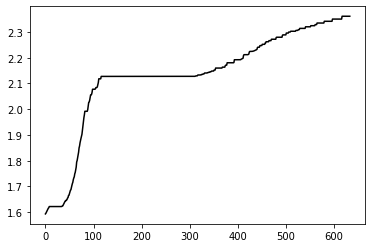

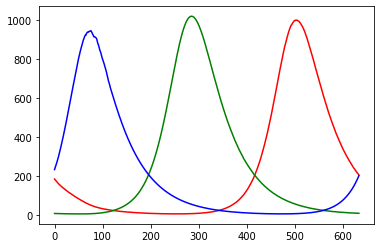

idx: 46


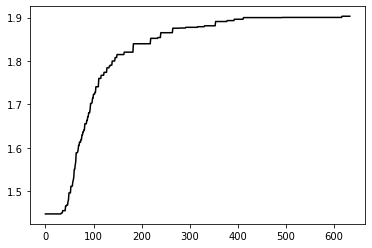

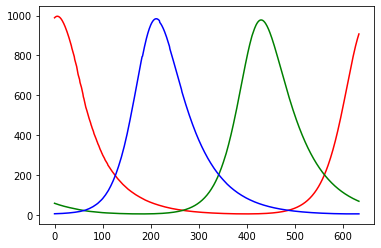

idx: 47


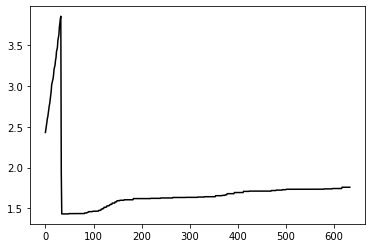

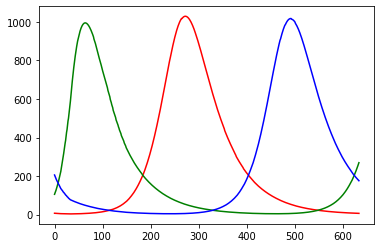

idx: 48


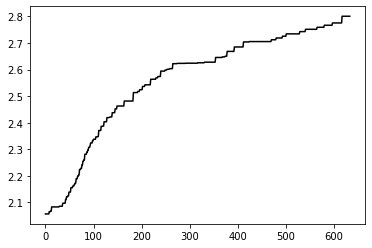

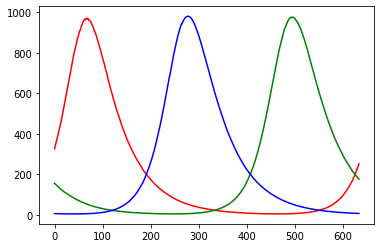

idx: 49


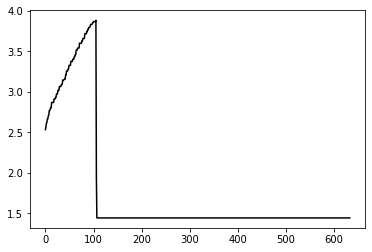

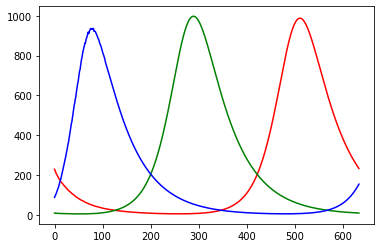

idx: 50


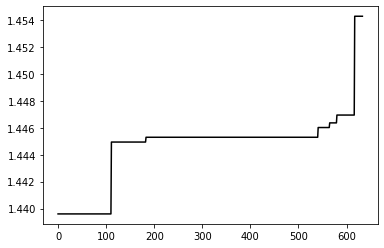

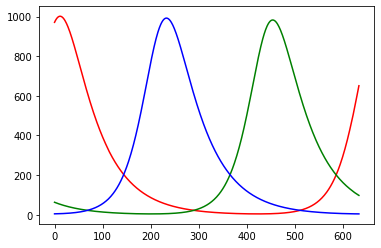

idx: 51


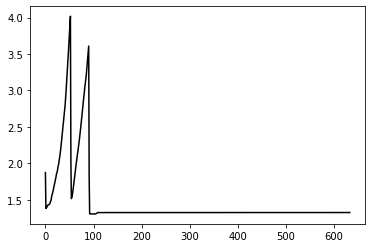

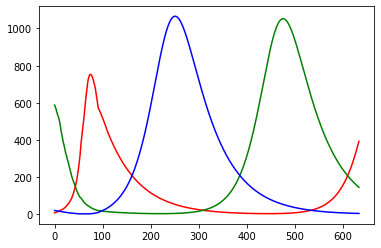

idx: 52


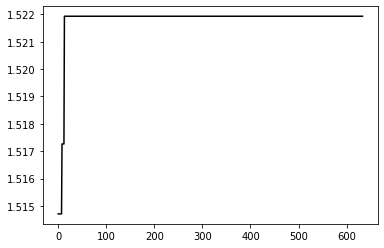

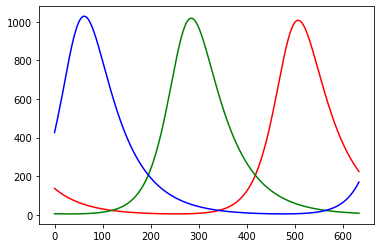

idx: 53


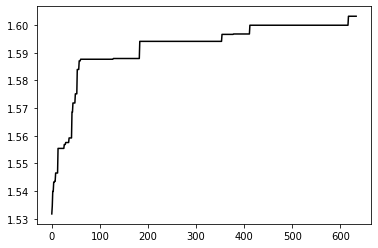

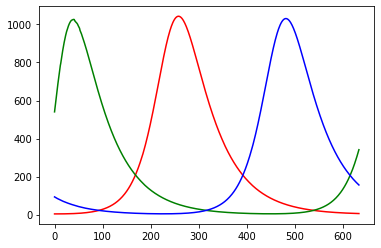

idx: 54


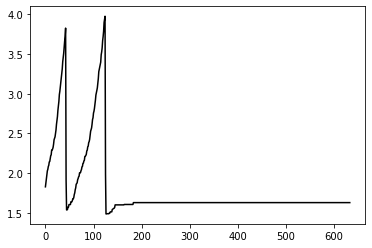

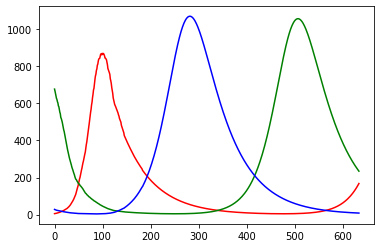

idx: 55


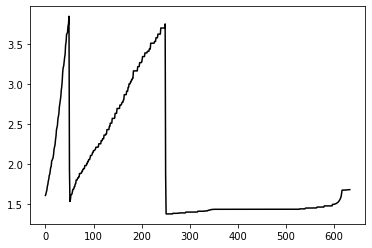

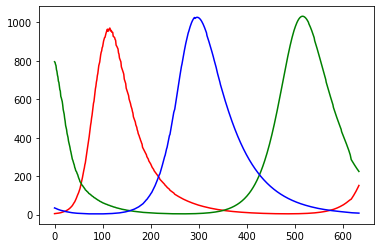

idx: 56


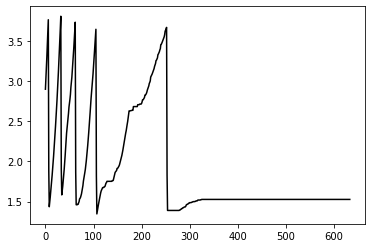

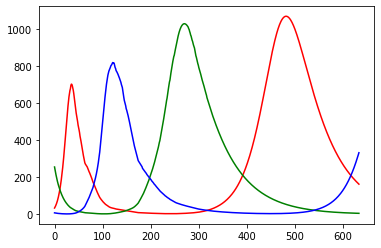

idx: 57


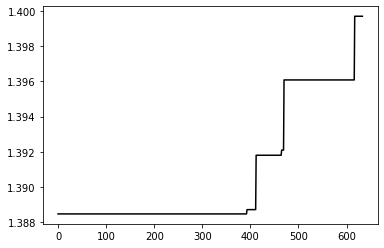

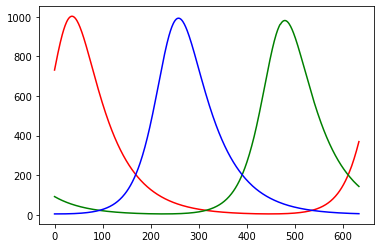

idx: 58


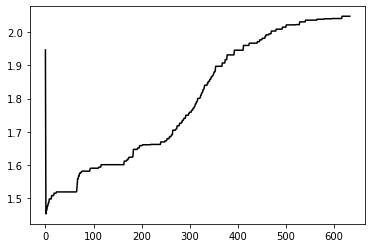

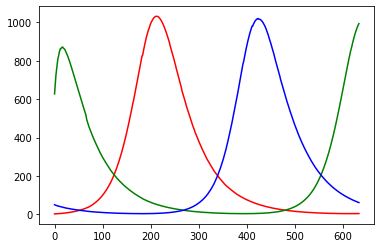

idx: 59


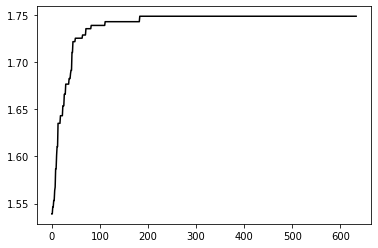

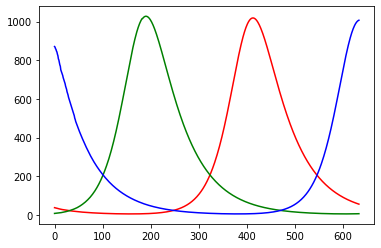

idx: 60


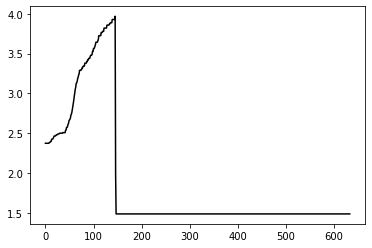

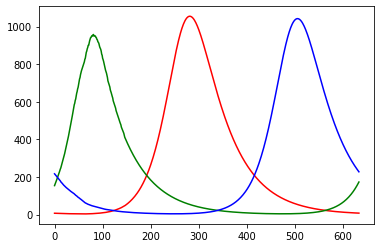

idx: 61


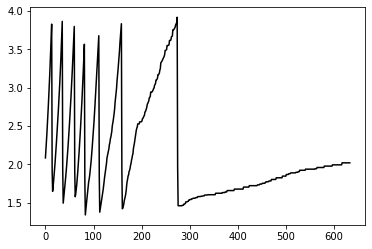

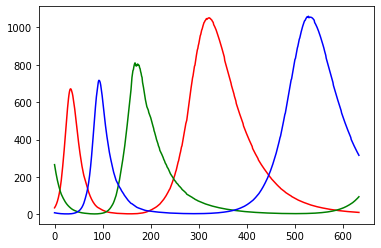

idx: 62


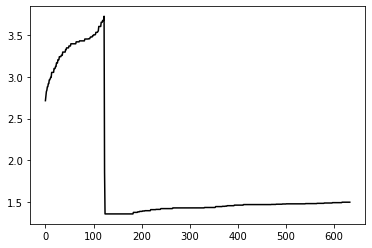

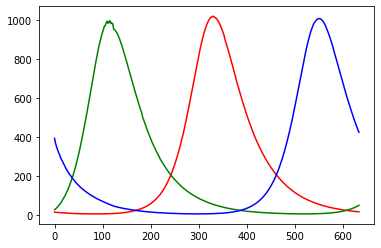

idx: 63


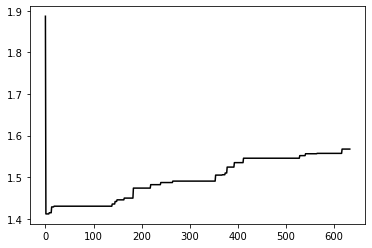

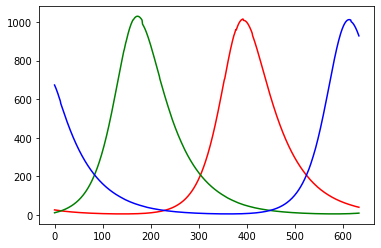

idx: 64


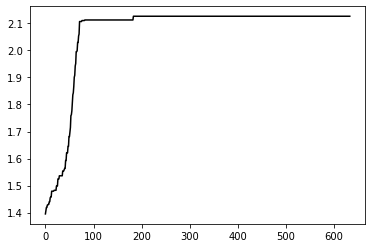

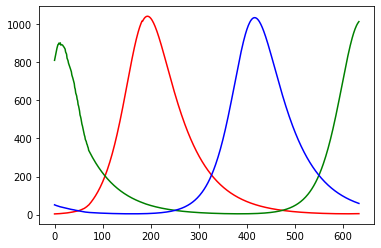

idx: 65


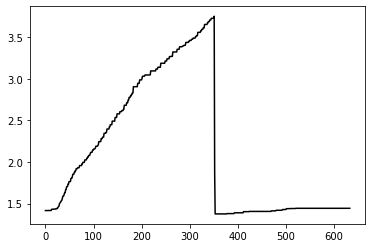

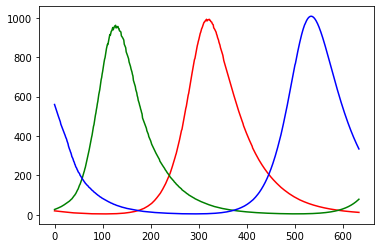

idx: 66


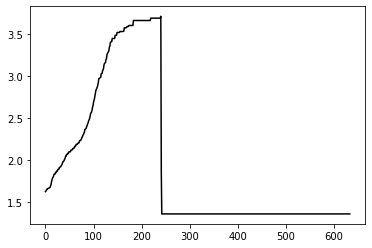

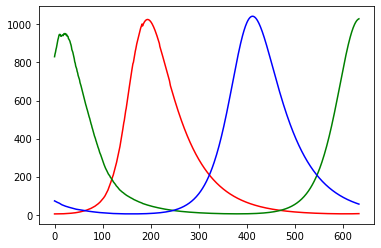

idx: 67


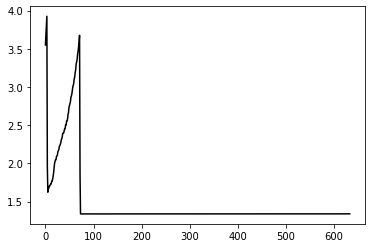

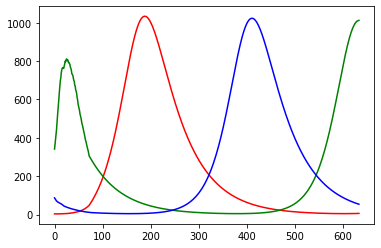

idx: 68


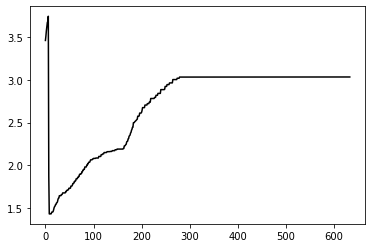

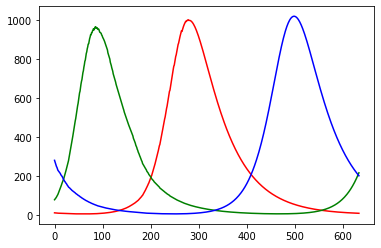

idx: 69


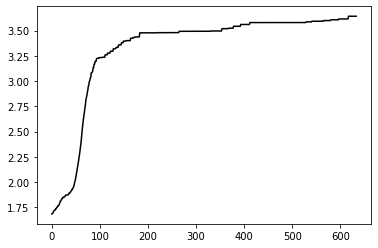

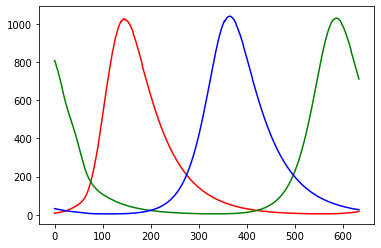

idx: 70


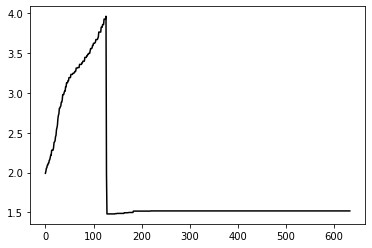

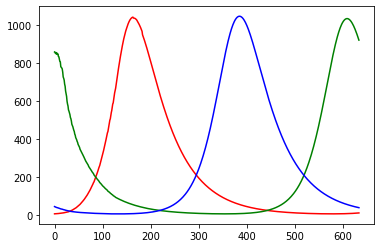

idx: 71


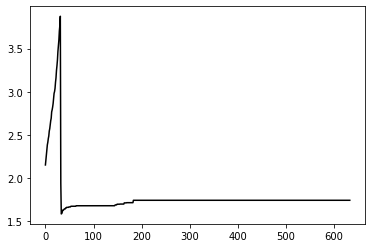

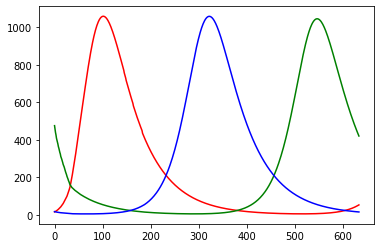

idx: 72


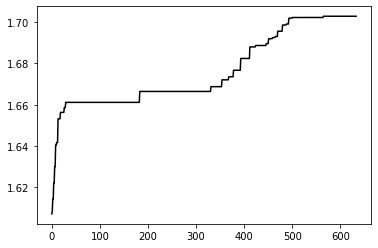

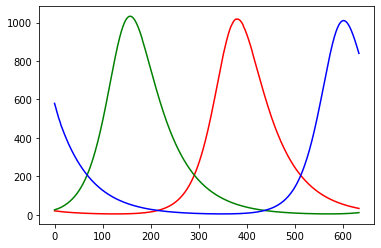

idx: 73


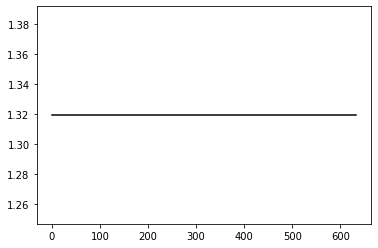

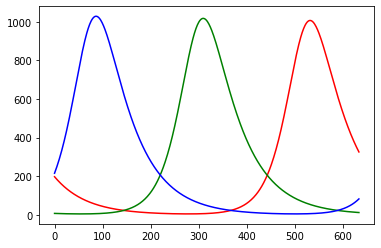

idx: 74


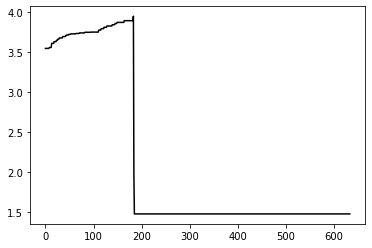

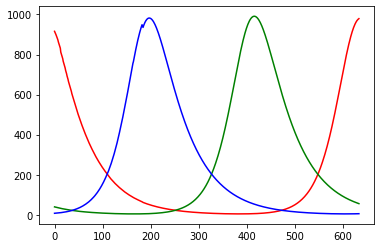

idx: 75


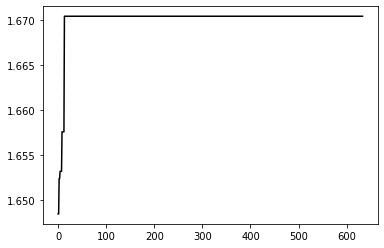

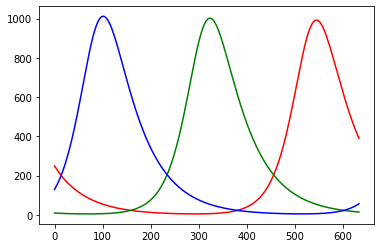

idx: 76


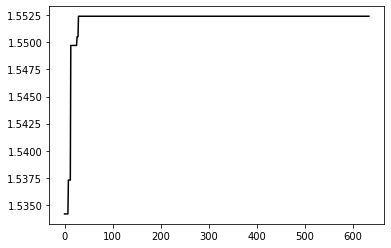

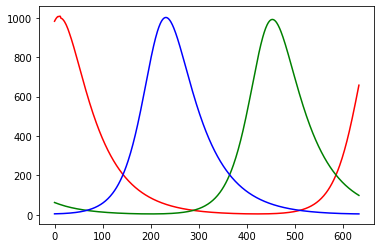

idx: 77


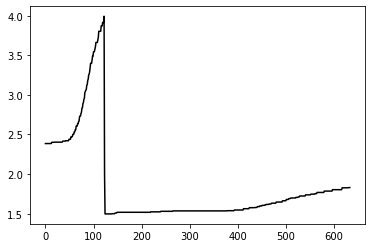

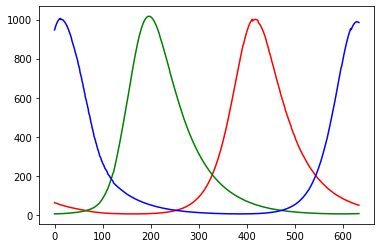

idx: 78


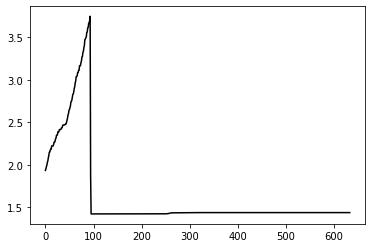

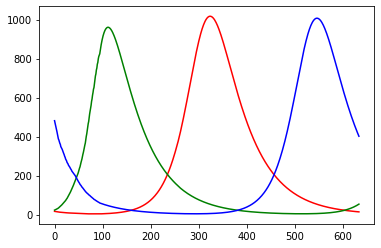

idx: 79


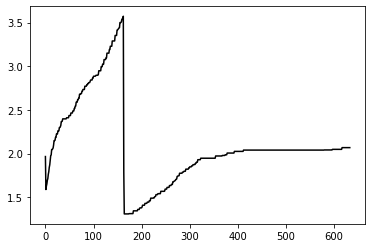

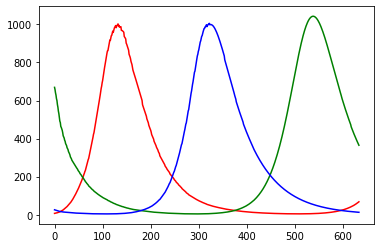

idx: 80


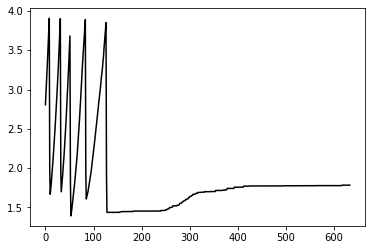

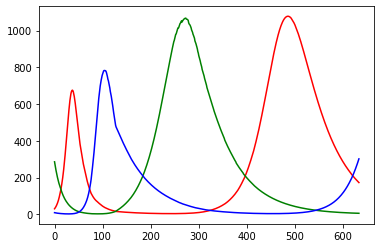

idx: 81


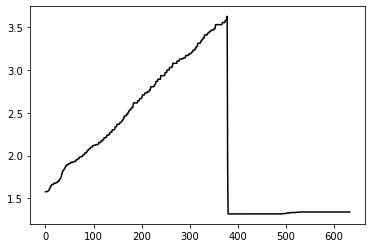

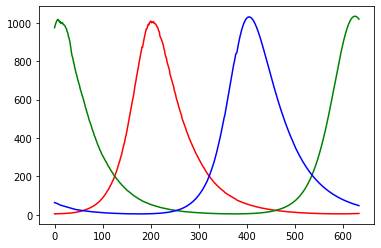

idx: 82


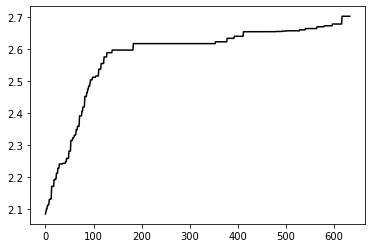

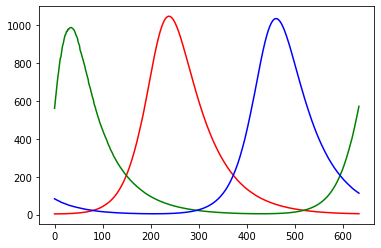

idx: 83


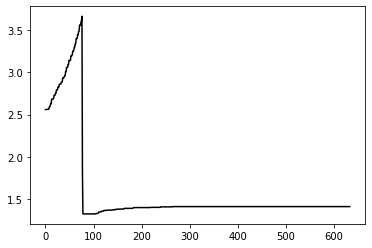

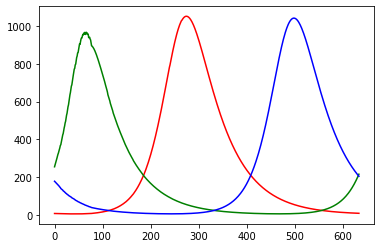

idx: 84


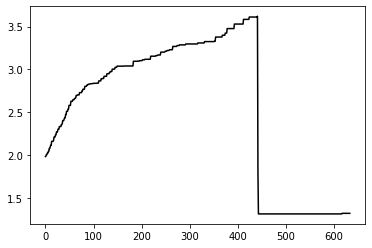

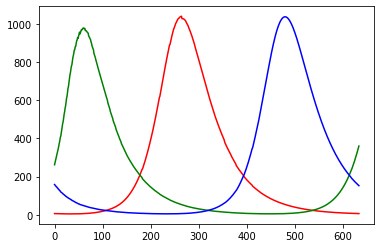

idx: 85


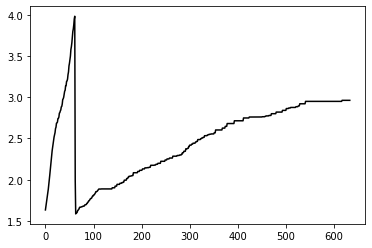

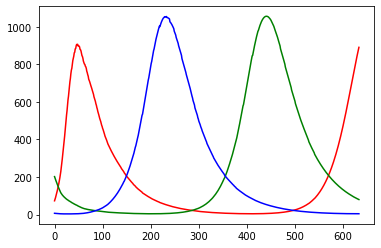

idx: 86


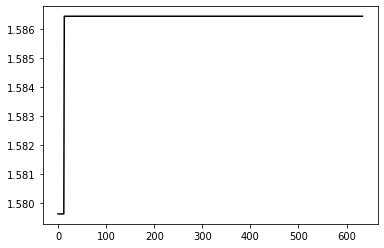

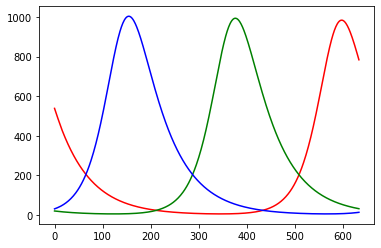

idx: 87


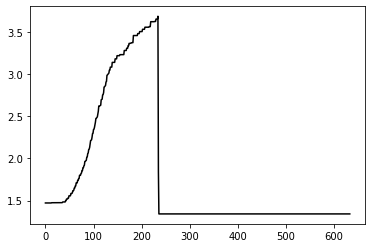

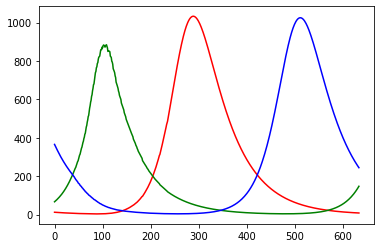

idx: 88


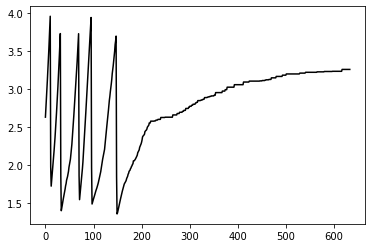

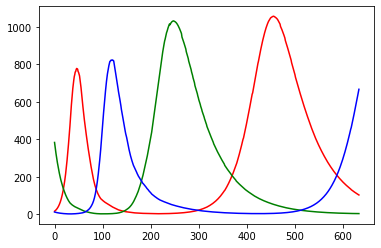

idx: 89


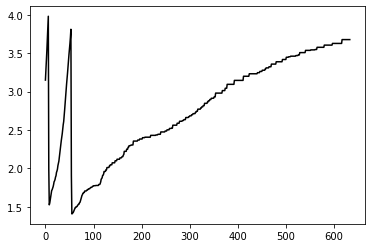

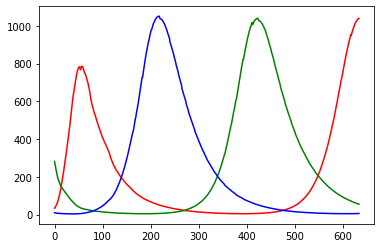

idx: 90


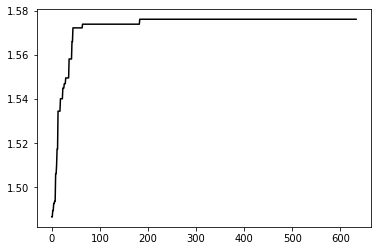

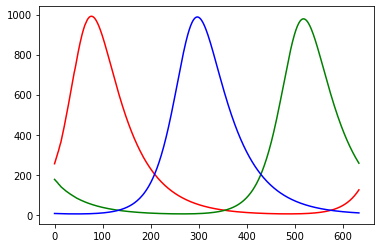

idx: 91


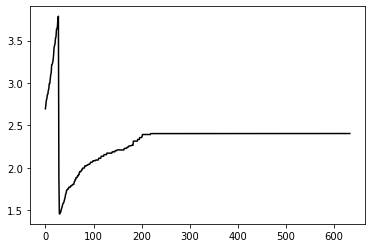

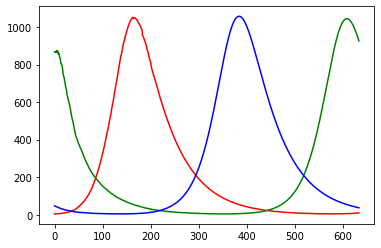

idx: 92


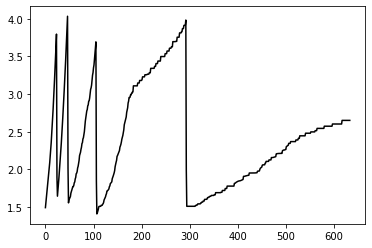

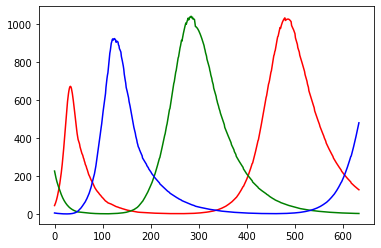

idx: 93


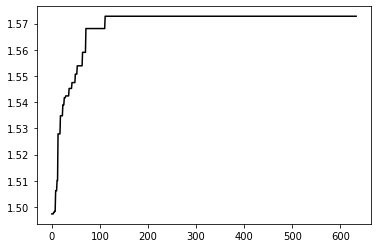

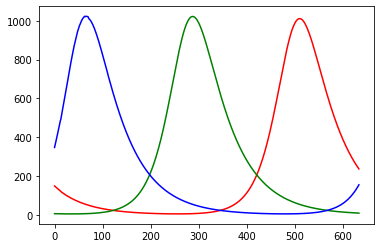

idx: 94


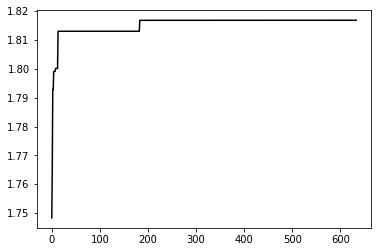

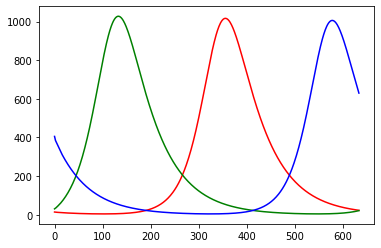

idx: 95


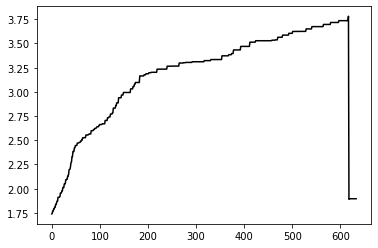

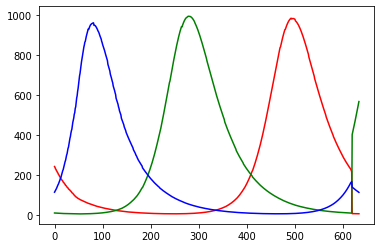

idx: 96


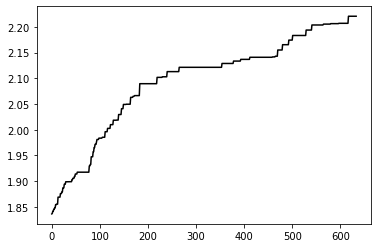

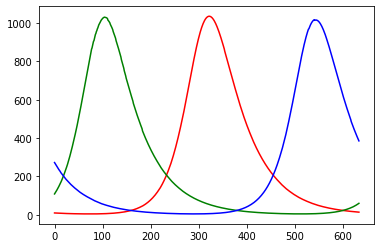

idx: 97


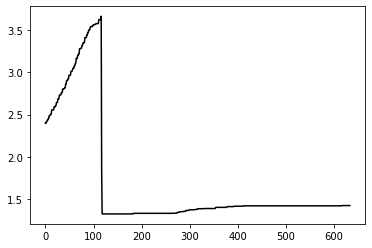

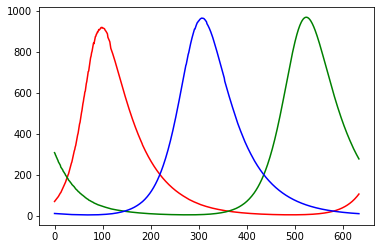

idx: 98


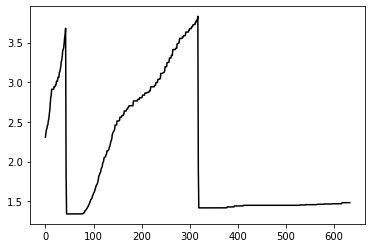

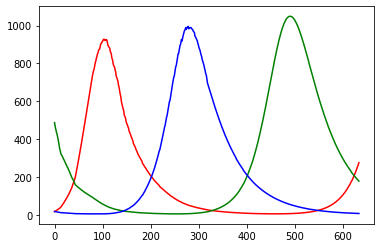

idx: 99


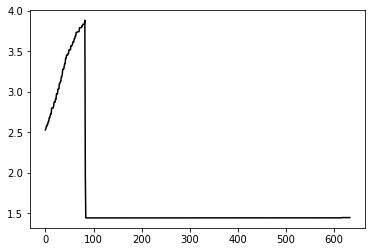

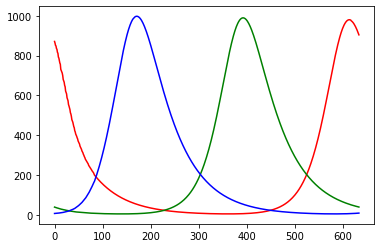

In [62]:
edges = np.array([df['rad_edge'].loc[idx] for idx in df.index])
for cell in range(100):
    print(f"idx: {cell}")
    cell_serie = df[str(cell)]
    indexes = df.index
    rads = [cell_serie.loc[idx]['rad'] for idx in indexes]
    vols = [cell_serie.loc[idx]['vol'] for idx in indexes]
    R = [cell_serie.loc[idx]['fluo'][0] for idx in indexes]
    G = [cell_serie.loc[idx]['fluo'][1] for idx in indexes]
    B = [cell_serie.loc[idx]['fluo'][2] for idx in indexes]
    
    plt.plot(vols, 'k')
    plt.show()
    
    plt.plot(R, 'r')
    plt.plot(G, 'g')
    plt.plot(B, 'b')
    
    plt.show()

In [63]:
df.to_json('fluo_tracking_1000.json')

In [15]:
rads = [df['99'].loc[idx][0] for idx in df.index]

In [90]:
edges = [df['rad_edge'].loc[idx] for idx in df.index]
R = [df['9218'].loc[idx][1][0] for idx in df.index]
G = [df['9218'].loc[idx][1][1] for idx in df.index]
B = [df['9218'].loc[idx][1][2] for idx in df.index]

In [95]:
edges

[70.88386621780315,
 70.92592155520127,
 71.05759756635976,
 71.29646513273856,
 71.47935032735771,
 71.69872395952999,
 72.27532757921541,
 72.53892259435536,
 72.74531758437097,
 72.99894479808987,
 73.21550325963547,
 73.45377579770609,
 73.71747184659614,
 74.04838838563685,
 74.31108949111605,
 74.4867995143335,
 74.6758484868889,
 74.86729720993213,
 75.02530968350942,
 75.22773263688185,
 75.42297075166081,
 75.58690576336625,
 75.80407375854128,
 75.96403784694111,
 76.20358134809688,
 76.44854085246602,
 77.21144989562534,
 77.4768639715417,
 77.64416805985496,
 77.76720865125621,
 77.97665764518922,
 78.20358097497926,
 78.41904682307838,
 78.60159986726359,
 78.8016230373829,
 79.01589003846652,
 79.20723657224165,
 79.47411068271522,
 79.71911610279834,
 80.12957244321638,
 80.35829558487775,
 80.60377151921253,
 80.79262191636845,
 81.05561749196902,
 81.24561505817931,
 81.54175925652602,
 81.79385033332157,
 82.0046112464526,
 82.28624458157444,
 82.48099945916475,
 82.9

### OLD

In [20]:
r.max()

70.88386621780315

In [21]:
r.min()

1.1054535342685885

In [30]:
np.where((r>35) & (r<36) )

(array([ 551,  569,  638,  673,  675,  677,  706,  711,  748,  826,  856,
         862,  874,  916,  920,  926,  936,  956,  975,  984, 1003, 1026,
        1033, 1171, 1174, 1175, 1182, 1194, 1200, 1245, 1247, 1276, 1302,
        1303, 1306, 1365, 1382, 1397, 1551, 1555, 1561, 1609, 1634, 1657,
        1668, 1728, 1734, 1848, 1876, 1929, 1932, 1980, 2033, 2100, 2168,
        2246, 2501, 2732, 2734, 2801, 2998, 3000, 3048, 3339, 3400, 3401,
        3477, 3597, 3600, 3665, 3666, 3745, 3752, 4049, 4303, 4662, 4795,
        4798]),)

In [69]:
cell1 = str(2931)
cell2 = str(9855)
fluos1 = []
fluos2 = []
pos_edge1 = []
pos_rad1 = []
pos_edge2 = []
pos_rad2 = []
# start from step = 715 where number of cells = 25k
for k in range(392, len(database)-1):
    data = database[str(k)]
    posx = np.array([data[ky]['pos'][0] for ky in data.keys()])
    posy = np.array([data[ky]['pos'][1] for ky in data.keys()])
    r_cells = np.sqrt(posx**2+posy**2)
    r_max = r_cells.max()
    
    print(f"Rad max: {r_max}")
    
    ## CELL 1
    # hasn't divided
    if cell1 in database[str(k)].keys():
        fluos1.append([k, data[cell1]['fluo']])
        pos = data[cell1]['pos']
        rad = np.sqrt(pos[0]**2+pos[1]**2)
        print(f"Rad cell1: {rad}")
        
        pos_edge1.append(r_max-rad)
        pos_rad1.append(rad)
        
    # divided
    else:
        try:
            succ1 = list(G1.successors(int(cell1)))
            cell1 = str(succ1[0])
            
            fluos1.append([k, data[cell1]['fluo']])
            pos = data[cell1]['pos']
            rad = np.sqrt(pos[0]**2+pos[1]**2)
            print(f"Rad cell2: {rad}")
            
            pos_edge1.append(r_max-rad)
            pos_rad1.append(rad)
        except:
            pass
        
    ## CELL 2
    # hasn't divided
    if cell2 in database[str(k)].keys():
        fluos2.append([k, data[cell2]['fluo']])
        pos = data[cell2]['pos']
        rad = np.sqrt(pos[0]**2+pos[1]**2)
        pos_edge2.append(r_max-rad)
        pos_rad2.append(rad)
        
    # divided
    else:
        try:
            succ2 = list(G2.successors(int(cell2)))
            cell2 = str(succ2[1])
            
            fluos2.append([k, data[cell2]['fluo']])
            pos = data[cell2]['pos']
            rad = np.sqrt(pos[0]**2+pos[1]**2)
            pos_edge2.append(r_max-rad)
            pos_rad2.append(rad)
            
        except:
            pass

Rad max: 70.88386621780315
Rad cell1: 35.91647430914468
Rad max: 70.92592155520127
Rad cell1: 35.93447140082563
Rad max: 71.05759756635976
Rad cell1: 35.95051426747634
Rad max: 71.29646513273856
Rad cell1: 35.97924590957971
Rad max: 71.47935032735771
Rad cell1: 35.99410305724812
Rad max: 71.69872395952999
Rad cell1: 36.0198180691297
Rad max: 72.27532757921541
Rad cell1: 36.021421222364935
Rad max: 72.53892259435536
Rad cell1: 36.0421038894923
Rad max: 72.74531758437097
Rad cell1: 36.04215518604135
Rad max: 72.99894479808987
Rad cell1: 36.07608500425694
Rad max: 73.21550325963547
Rad cell1: 36.08066221749415
Rad max: 73.45377579770609
Rad cell1: 36.09255326098413
Rad max: 73.71747184659614
Rad cell1: 36.127422904625035
Rad max: 74.04838838563685
Rad cell1: 36.112127449088
Rad max: 74.31108949111605
Rad cell1: 36.132431508916326
Rad max: 74.4867995143335
Rad cell1: 36.152837584494215
Rad max: 74.6758484868889
Rad cell1: 36.182934523985786
Rad max: 74.86729720993213
Rad cell1: 36.19446320

Rad max: 109.64215842584359
Rad cell1: 37.763880443888596
Rad max: 109.89321771773179
Rad cell1: 37.7720882661546
Rad max: 110.11814206053613
Rad cell1: 37.77885623138805
Rad max: 110.3699647401648
Rad cell1: 37.78867924707885
Rad max: 110.60151727125236
Rad cell1: 37.80361660414962
Rad max: 110.79315338301228
Rad cell1: 37.80549582073534
Rad max: 111.00496051436829
Rad cell1: 37.8174165742812
Rad max: 111.17151056916232
Rad cell1: 37.80703495857978
Rad max: 111.61188471869315
Rad cell1: 37.82219237837281
Rad max: 111.91693316594558
Rad cell1: 37.83184382897177
Rad max: 112.17506107820755
Rad cell1: 37.84267660866765
Rad max: 112.41680851521716
Rad cell1: 37.852570925113646
Rad max: 112.6217847786624
Rad cell1: 37.84834282300583
Rad max: 112.8625466786349
Rad cell1: 37.86266934818595
Rad max: 113.09185662592586
Rad cell1: 37.87047146983318
Rad max: 113.27472647076229
Rad cell1: 37.86865454463734
Rad max: 113.50837926755888
Rad cell1: 37.880291946215685
Rad max: 113.69276479995855
Rad c

Rad max: 147.89947272644088
Rad cell1: 38.47697856416451
Rad max: 148.06406086447194
Rad cell1: 38.48306203286021
Rad max: 148.26573926923047
Rad cell1: 38.48182620198875
Rad max: 148.4520318126948
Rad cell1: 38.48482849565013
Rad max: 148.58362505764782
Rad cell1: 38.49270878893789
Rad max: 149.24361844008166
Rad cell1: 38.491097503193316
Rad max: 149.24383136325477
Rad cell1: 38.496662098611004
Rad max: 149.3652751226774
Rad cell1: 38.49353930895348
Rad max: 149.5794436692866
Rad cell1: 38.49365889782791
Rad max: 149.79822226973684
Rad cell1: 38.50123525871386
Rad max: 151.0617894942027
Rad cell1: 38.50007920617122
Rad max: 151.2862371878994
Rad cell1: 38.50433017957654
Rad max: 151.51081523727225
Rad cell1: 38.50534001819424
Rad max: 152.1537145338552
Rad cell1: 38.504456355135844
Rad max: 152.41321911326548
Rad cell1: 38.509301259314014
Rad max: 152.65010456072244
Rad cell1: 38.511518337016774
Rad max: 152.90679120442482
Rad cell1: 38.51060606447769
Rad max: 153.10941718948735
Rad 

Rad max: 185.83975924885002
Rad cell1: 38.936109120841714
Rad max: 186.06227418119875
Rad cell1: 38.935620764709725
Rad max: 186.29303877314007
Rad cell1: 38.942187058897986
Rad max: 186.47066482477757
Rad cell1: 38.94356748923466
Rad max: 186.66450942506324
Rad cell1: 38.9493045374337
Rad max: 186.85779283400197
Rad cell1: 38.95448147618701
Rad max: 187.06483730110762
Rad cell1: 38.95689217270105
Rad max: 187.30900299188247
Rad cell1: 38.96059182054106
Rad max: 187.7726697770835
Rad cell1: 38.9651280494307
Rad max: 187.97674720093946
Rad cell1: 38.966519176522254
Rad max: 188.1944101106688
Rad cell1: 38.971514781532306
Rad max: 188.40294047036278
Rad cell1: 38.97527596290001
Rad max: 188.59231670464277
Rad cell1: 38.97777955731387
Rad max: 188.7657254998165
Rad cell1: 38.981375680231416
Rad max: 188.91019671978145
Rad cell1: 38.98108578123173
Rad max: 189.94237842421344
Rad cell1: 38.98861973464842
Rad max: 190.1412981319889
Rad cell1: 38.992265972034495
Rad max: 190.26660944370107
Ra

Rad max: 224.64389468950628
Rad cell1: 39.24252187092926
Rad max: 224.89918123069958
Rad cell1: 39.243463832878994
Rad max: 225.16404851214187
Rad cell1: 39.24599470647729
Rad max: 225.42338899217611
Rad cell1: 39.24764536242886
Rad max: 225.66216114621966
Rad cell1: 39.24817154591856
Rad max: 225.88805506602574
Rad cell1: 39.25106402888093
Rad max: 226.21207896575694
Rad cell1: 39.25114789740114
Rad max: 226.43833246103756
Rad cell1: 39.25236024517198
Rad max: 226.65851610260162
Rad cell1: 39.25385982127947
Rad max: 226.88197967920954
Rad cell1: 39.254971729474406
Rad max: 227.0373579484469
Rad cell1: 39.25003171398798
Rad max: 227.32589501242313
Rad cell1: 39.256523733723654
Rad max: 227.6035807023668
Rad cell1: 39.256248952950365
Rad max: 227.8569512626016
Rad cell1: 39.25627248510906
Rad max: 228.10161198038784
Rad cell1: 39.25622576062567
Rad max: 228.3854289824517
Rad cell1: 39.257719661435296
Rad max: 228.6785831450658
Rad cell1: 39.258120924520604
Rad max: 228.93922140782976
Ra

In [18]:
dic = {'fluo1': fluos1, 'fluo2': fluos2}
with open(f"fluo_track_{gamma}_{d}.json", 'w') as outfile:  
    json.dump(dic, outfile)

In [64]:
1026-715

311

#### Read JSON

In [4]:
import json

In [12]:
path = 'track/'
gamma = 0.0
d = 10000.0
file = f"fluo_track_{gamma}_{d}.json"

In [13]:
with open(path+file) as json_file:  
    fluos = json.load(json_file)

In [14]:
fluos1 = fluos['fluo1']
fluos2 = fluos['fluo2']

### Selecting second child

In [41]:
ks1 = [f[0] for f in fluos1]
R1 = [f[1][0] for f in fluos1]
G1 = [f[1][1] for f in fluos1]
B1 = [f[1][2] for f in fluos1]
ks2 = [f[0] for f in fluos2]
R2 = [f[1][0] for f in fluos2]
G2 = [f[1][1] for f in fluos2]
B2 = [f[1][2] for f in fluos2]

In [42]:
print(max(R1))
print(max(G1))
print(max(B1))

999.2296360142545
988.1137342451848
975.6383781375208


In [43]:
print(max(R2))
print(max(G2))
print(max(B2))

1044.4774533070529
1056.6749346809352
918.9988834912381


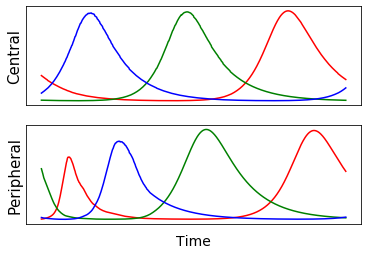

In [44]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(R1, 'r')
ax1.plot(G1, 'g')
ax1.plot(B1, 'b')
#ax1.set_xlim([0,1026])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('Central', fontsize=15)
ax2.plot(R2, 'r')
ax2.plot(G2, 'g')
ax2.plot(B2, 'b')
#ax2.set_xlim([0,1026])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylabel('Peripheral', fontsize=15)
ax2.set_xlabel('Time', fontsize=14, labelpad=10)
plt.savefig(f"fluo_track_{gamma}_{d}.png", density=300, bbox_inches='tight')

Text(0, 0.5, 'Rad cell middle')

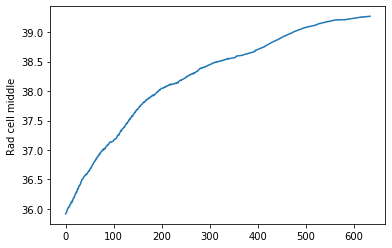

In [70]:
#plt.plot(pos_edge1)
plt.plot(pos_rad1)
plt.ylabel("Rad cell middle")

Text(0, 0.5, 'Rad cell edge')

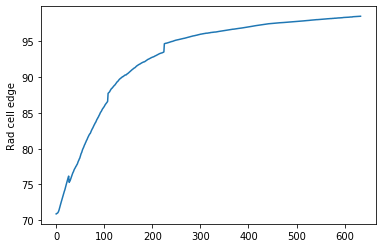

In [71]:
#plt.plot(pos_edge2)
plt.plot(pos_rad2)
plt.ylabel("Rad cell edge")